# Tipos de Variables
- Categóricas:
  - Ordinales: Siguen un orden específico
  - Numéricas: No tienen un orden específico
  - Binarias: Son aquellas que se dividen en 2 opciones
- Numéricas:
  - Discretas: Pueden tomar cualquier valor entero
  - Continuas: Pueden tomar cualquier valor de los reales

Hasta ahora, únicamente hemos trabajado con variables numéricas.

Para representar gráficamente los datos, se pueden utilizar:
- Histogramas
- Pie plots
- Box plots
- Violin plots
- Heat maps. Los colores fuera de la diagonal, muestran la correlación entre los datos
Estos son los más comunes

Entonces, ¿cómo representamos una variable categórica?
Podemos asignarles un valor numérico para tratarlos como variables discretas. Otra opción es asignar un binario a los datos.

La función get.dumny asigna ceros o unos a una categoría para tratarlos como binarios.

Hoy exploraremos el conjunto de datos, para ubicar el tipo de variables con las que contamos en el dataset para decidir cuál es la mejor manera de representar los datos gráficamente.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
warnings.filterwarnings('ignore')

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
data_frame = pd.read_csv('/content/drive/MyDrive/Data/CarPrice_Assignment.csv',delimiter=',')
data_frame.set_index('car_ID', inplace = True)
data_frame.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Image("/content/drive/MyDrive/DCI_data/ML2023/Carprice_dictionary.png") # Esta es una imagen que define cada variable en el dataset

# Separate Numerical and  Categorical data

In [47]:
#Primero, eliminaremos el nombre del carro del dataframe para quedarnos únicamente con el nombre de la compañía, ya que el nombre del carro es irrelevante para el análisis que queremos hacer
data_frame[['company', '1', '2', '3', '4']] = data_frame.CarName.str.split(expand = True)  #Dividimos la columna por espacios
data_frame = data_frame.drop(['CarName', '1', '2', '3', '4'], axis = 1)  #Eliminamos las columnas con el nombre del carro
data_frame

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo


In [48]:
numerical = data_frame.select_dtypes(include = ['number'])
categorical = data_frame.select_dtypes(include = ['object', 'category'])

In [49]:
numerical.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [50]:
categorical.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,company
car_ID,,,,,,,,,,
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
3,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
4,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
5,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


# Analiza la dependencia del valor del auto como función de cada variable categorica

In [85]:
data_frame.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
#Vamos a renombrar las compañias que hay repetidas con diferentes nombres


In [84]:
#Asignamos un valor numérico a cada variable categórica
company = pd.get_dummies(data_frame.company)
fuel = pd.get_dummies(data_frame.fueltype)
aspiration = pd.get_dummies(data_frame.aspiration)
doors = pd.get_dummies(data_frame.doornumber)
body = pd.get_dummies(data_frame.carbody)
enginelocation = pd.get_dummies(data_frame.enginelocation)
drivewheel = pd.get_dummies (data_frame.drivewheel)
enginetype = pd.get_dummies (data_frame.enginetype)
cylinder = pd.get_dummies (data_frame.cylindernumber)
fuelsys = pd.get_dummies (data_frame.fuelsystem)
company

,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
car_ID,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [77]:
label_num = numerical.columns
precio = numerical.price

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

KeyError: ignored

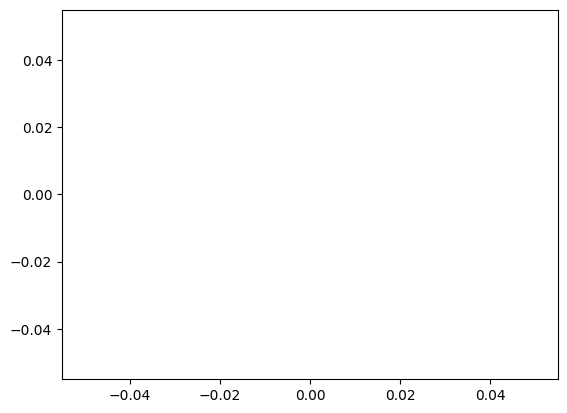

In [78]:
#Precio vs companía
fig = plt.plot (figsize=(12, 3))

for i in range(len(label_num)):
    company[i].scatter(precio[:,i])
    company[i].set_xlabel(labels[i])
fig.suptitle('Distribución de caracteristicas ANTES de normalizar')
plt.show()